In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import os
root_folder = r"E:\data\From server\24 Hour Stacks\first_10"

phases = []
delta_phases = []
folders = []
ref_locs = []

for folder in os.listdir(root_folder):
    oog = OG.BasicOpticalGating()
    for file in os.listdir(root_folder  + "/" + folder):
        # Run OOG
        if file.startswith("Brightfield"):
            oog.sequence_manager.set_source(root_folder + "/" + folder + "/" + file + "/*tif")
        elif file.startswith("ref-frames"):
            oog.sequence_manager.set_reference_sequence(root_folder + "/" + folder + "/" + file + "/*tif")
            oog.sequence_manager.reference_period = np.loadtxt(root_folder + "/" + folder + "/" + file + "/period.txt")[0]
    oog.run()
    folders.append(folder)
    phases.append(oog.phases)
    delta_phases.append(oog.delta_phases)
    

Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0001/Brightfield - Prosilica/*tif
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0001/ref-frames-2018-07-30-13.32.11/*tif
Getting SADs
Getting phases
Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0002/Brightfield - Prosilica/*tif
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0002/ref-frames-2018-07-30-13.36.14/*tif
Getting SADs
Getting phases
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0003/ref-frames-2018-07-30-13.41.22/*tif
Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0003/Brightfield - Prosilica/*tif
Getting SADs
Getting phases
Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0004/Brightfield - Prosilica/*tif
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0004/ref-frames-2018-07-30-13.46.17/*tif
Getting SADs
Get

In [5]:
delta_phase_all = np.concatenate(delta_phases)
phases_all = []
for phase in phases:
    phases_all.extend(phase[1::])

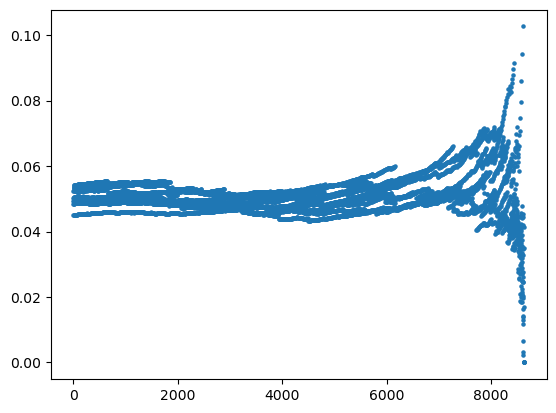

In [6]:
dist = 10

stds = []
for i in range(oog.delta_phases.shape[0]):
    stds.append(np.std(oog.delta_phases[i::dist]))

plt.scatter(range(len(stds)), stds, s = 5)
plt.show()

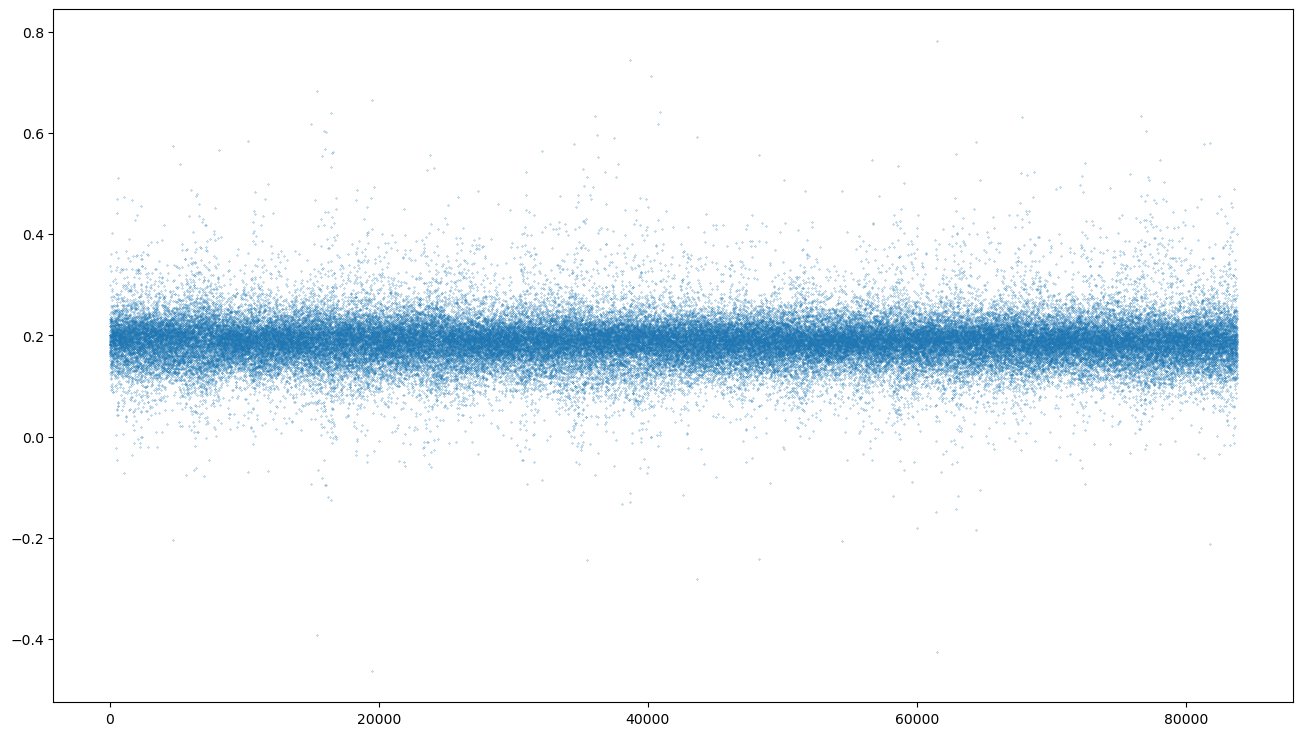

In [7]:
plt.figure(figsize = (16,9))
plt.scatter(range(len(delta_phase_all)), delta_phase_all, s = 0.05)
plt.show()

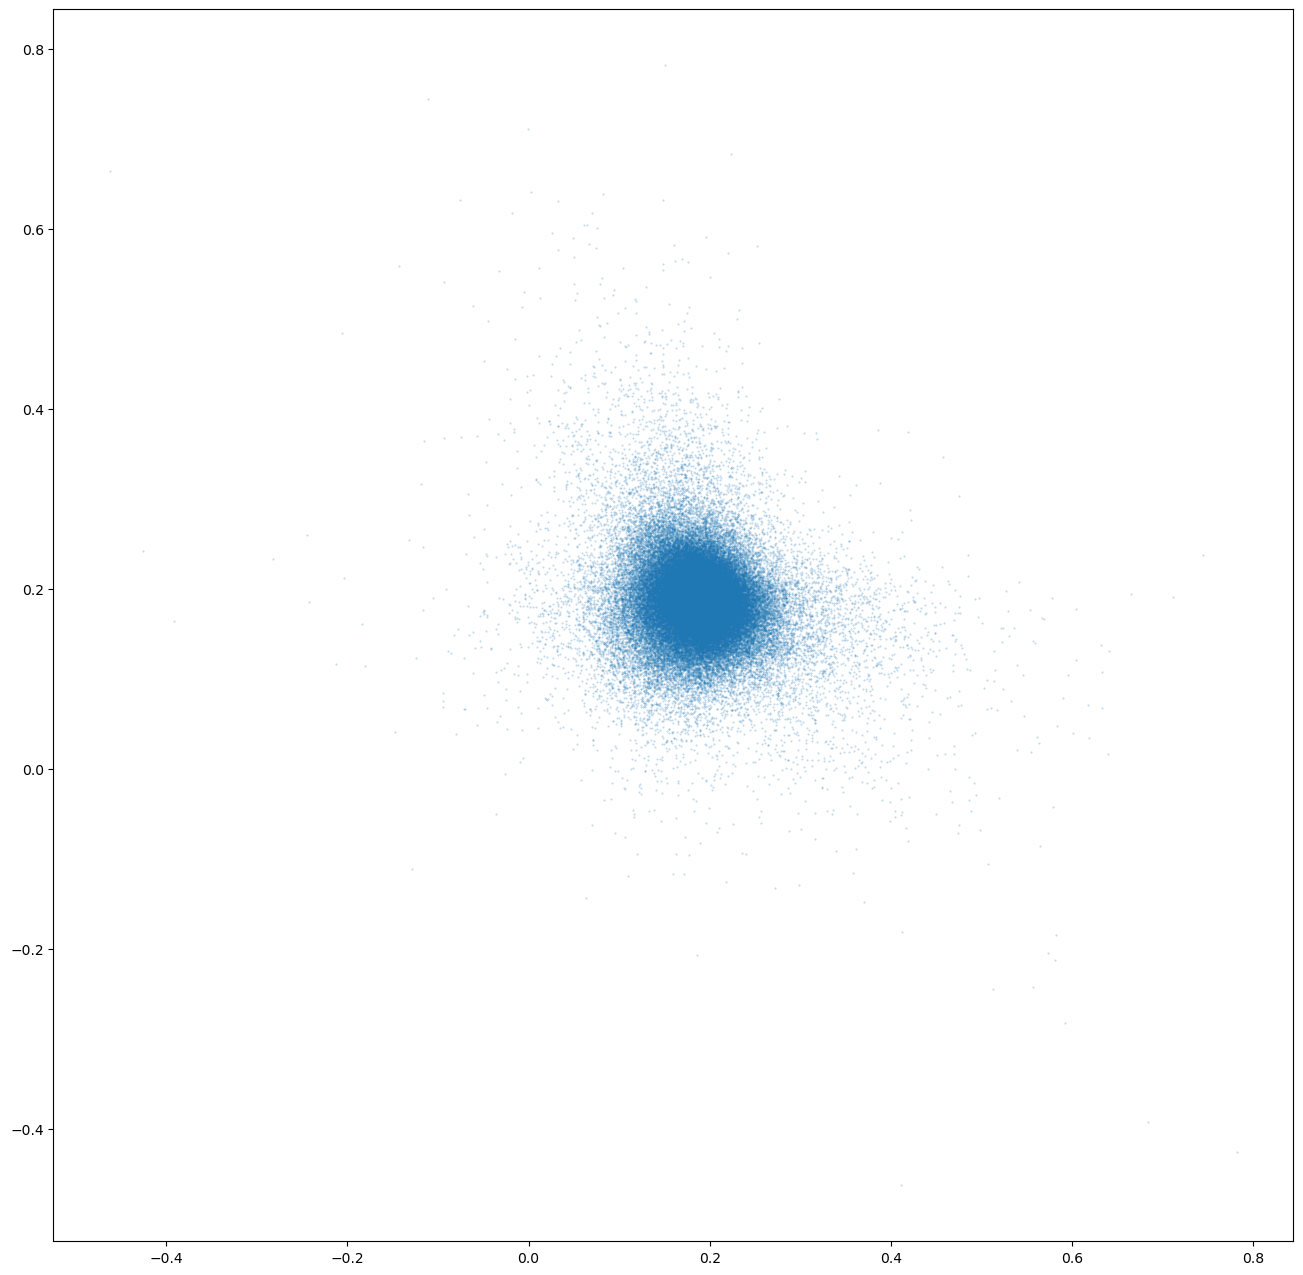

In [8]:
dist = 1
moving_average_delta_phase_all = np.convolve(delta_phase_all, np.ones(dist)/dist, mode = "same")
moving_average_phases_all = np.convolve(phases_all, np.ones(dist)/dist, mode = "same")

plt.figure(figsize = (16,16))
plt.scatter(moving_average_delta_phase_all[0:-1], moving_average_delta_phase_all[1::], s = 0.2, alpha = 0.3)#, c = range(moving_average_delta_phase_all[1::].shape[0]))

#plt.xlim(-0.1,0.5)
#plt.ylim(-0.1,0.5)
plt.show()

In [14]:
print(oog.delta_phases.shape)

(8634,)


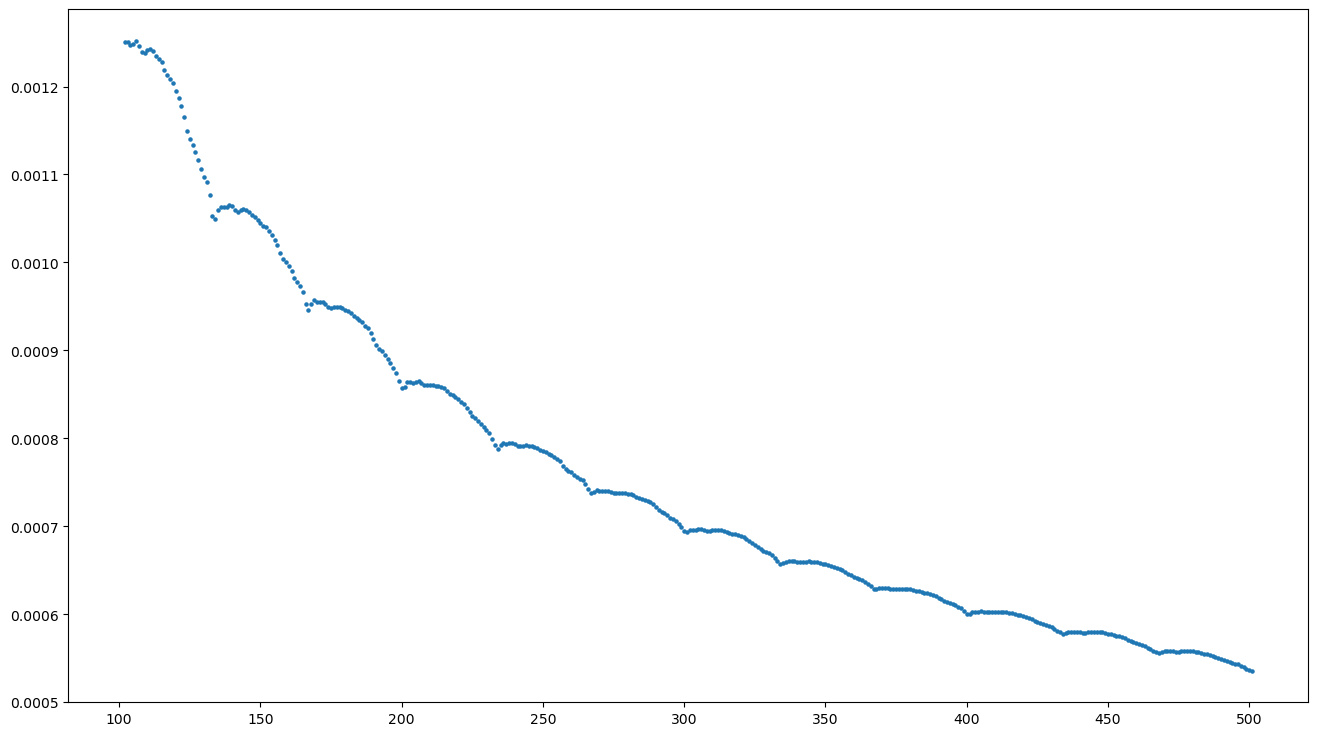

In [17]:
std_phases = []
differences = []
differences_all = []
mean_delta_phases_all = []

for i in range(2, 8634):
    mean_delta_phases = []
    for j in range(2, 8634):
        if j + i < oog.delta_phases.shape[0]:
            #differences_all.append(i)
            mean_delta_phases.append(np.mean(oog.delta_phases[j:j+i]))
            #mean_delta_phases_all.append(np.mean(oog.delta_phases[j:j+i]))
    if np.any(mean_delta_phases) == np.nan:
        print("Nan for {i} and {j}")
    std_phases.append(np.std(mean_delta_phases))
    differences.append(i)

plt.figure(figsize = (16,9))
plt.scatter(differences[100:500], std_phases[100:500], s = 5)
plt.show()

In [ ]:
# Gets the noise spectrum by looking at the standard deviation of the change in delta phases over some time period.
def get_noise_spectrum(delta_phases, averaging_window):
    time_windows = range(1, (delta_phases.shape[0] - averaging_window) // 2)
    avg_delta_phases_std = []
    for time_window in time_windows:
        avg_delta_phases = []
        for i in np.arange(delta_phases.shape[0] - time_window - averaging_window):
            average_delta_phase_init = np.mean(delta_phases[i:i + averaging_window])
            average_delta_phase_final = np.mean(delta_phases[i + time_window:i + time_window + averaging_window])

            est_avg_delta_phases = average_delta_phase_init - average_delta_phase_final

            avg_delta_phases.append(est_avg_delta_phases)

        #plt.title(f"{time_window}")
        #plt.hist(avg_delta_phases, bins = 30)
        #plt.show()

        avg_delta_phases_std.append(np.std(avg_delta_phases))

    return time_windows, avg_delta_phases_std

In [16]:
noise_spectrum = get_noise_spectrum(delta_phase_all, 100)
plt.plot(*noise_spectrum)

NameError: name 'get_noise_spectrum' is not defined